In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
data = np.load("/data/mnist.npz")

In [4]:
train_images = data['x_train']
test_images = data['x_test']
train_labels = data['y_train']
test_labels = data['y_test']

Text(0.5, 1.0, '(Label: 7)')

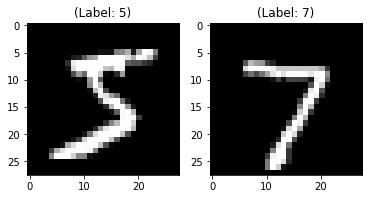

In [5]:
plt.subplot(121)
curr_img = np.reshape(train_images[0], (28,28))
curr_lbl = train_labels[0]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(curr_lbl) + ")")

plt.subplot(122)
curr_img = np.reshape(test_images[0], (28,28))
curr_lbl = test_labels[0]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(curr_lbl) + ")")

In [6]:
print("Training set (images) min: {min} to max: {max}".format(min=np.min(train_images), max=np.max(train_images)))
print("Testing set (images) min: {min} to max: {max}".format(min=np.min(test_images), max=np.max(test_images)))

Training set (images) min: 0 to max: 255
Testing set (images) min: 0 to max: 255


In [7]:
x_train = (train_images - np.min(train_images))/(np.max(train_images) - np.min(train_images))
x_test = (test_images - np.min(test_images))/(np.max(test_images) - np.min(test_images))

In [8]:
print("Training set (images) min: {min} to max: {max}".format(min=np.min(x_train), max=np.max(x_train)))
print("Testing set (images) min: {min} to max: {max}".format(min=np.min(x_test), max=np.max(x_test)))

Training set (images) min: 0.0 to max: 1.0
Testing set (images) min: 0.0 to max: 1.0


In [9]:
print("Training set (images) shape: {shape}".format(shape=x_train.shape))
print("Training set (labels) shape: {shape}".format(shape=train_labels.shape))
print("Test set (images) shape: {shape}".format(shape=x_test.shape))
print("Test set (labels) shape: {shape}".format(shape=test_labels.shape))

Training set (images) shape: (60000, 28, 28)
Training set (labels) shape: (60000,)
Test set (images) shape: (10000, 28, 28)
Test set (labels) shape: (10000,)


In [10]:
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = np.reshape(x_test, (-1, 28, 28, 1))

In [11]:
y_train = np_utils.to_categorical(train_labels,10)
y_test = np_utils.to_categorical(test_labels,10)

In [12]:
print("label without onehot: {label}".format(label=train_labels[0]))
print("label with onehot: {label}".format(label=y_train[0]))

label without onehot: 5
label with onehot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
print("Training set (images) shape: {shape}".format(shape=x_train.shape))
print("Training set (labels) shape: {shape}".format(shape=y_train.shape))
print("Test set (images) shape: {shape}".format(shape=x_test.shape))
print("Test set (labels) shape: {shape}".format(shape=y_test.shape))

Training set (images) shape: (60000, 28, 28, 1)
Training set (labels) shape: (60000, 10)
Test set (images) shape: (10000, 28, 28, 1)
Test set (labels) shape: (10000, 10)


In [14]:
batch_size = 128

# MNIST data input (img shape: 28*28)
n_input = 28

# MNIST total classes (0-9 digits)
n_classes = 10

开始建立tensorflow图表：

In [15]:
x = tf.placeholder("float", [None, 28, 28, 1])
y = tf.placeholder("float", [None, n_classes])

x_shape: (batch_size, 28, 28, 1)

y_shape: (batch_size, 10)

In [16]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')

conv = w*x + b

In [17]:
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()),
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()),
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()),
    'wd1': tf.get_variable('W3', shape=(4*4*128,128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()),
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(10), initializer=tf.contrib.layers.xavier_initializer()),
}

In [18]:
x.shape

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)])

In [19]:
conv1 = conv2d(x, weights['wc1'], biases['bc1'])

In [20]:
conv1.shape

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(32)])

In [21]:
conv1_mp = maxpool2d(conv1, k=2)

if padding="same":

    output_shape = image_size / stides
    
    
if padding="valid":

    output_shape = (image_size - kernel_size + 1) / stides

In [22]:
conv1_mp.shape

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(32)])

In [23]:
conv1_mp = tf.layers.dropout(inputs=conv1_mp, rate=0.7)

In [24]:
conv1_mp

<tf.Tensor 'dropout/Identity:0' shape=(?, 14, 14, 32) dtype=float32>

In [25]:
conv2 = conv2d(conv1_mp, weights['wc2'], biases['bc2'])

In [26]:
conv2.shape

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(64)])

In [27]:
conv2_mp = maxpool2d(conv2, k=2)

In [28]:
conv2_mp.shape

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(64)])

In [29]:
conv2_mp = tf.layers.dropout(inputs=conv2_mp, rate=0.7)

In [30]:
conv3 = conv2d(conv2_mp, weights['wc3'], biases['bc3'])

In [31]:
conv3.shape

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(128)])

In [32]:
conv3_mp = maxpool2d(conv3, k=2)

In [33]:
conv3_mp.shape

TensorShape([Dimension(None), Dimension(4), Dimension(4), Dimension(128)])

这是由于padding='SAME'，当pool kernel走到图片边缘时，自动将边缘的一列或一行copy多一列或一行，让pooling kernel走完。

In [34]:
conv3_mp = tf.layers.dropout(inputs=conv3_mp, rate=0.7)

In [35]:
fc1 = tf.reshape(conv3_mp, [-1, weights['wd1'].get_shape().as_list()[0]])

In [36]:
fc1.shape

TensorShape([Dimension(None), Dimension(2048)])

In [37]:
fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])

In [38]:
fc1.shape

TensorShape([Dimension(None), Dimension(128)])

In [39]:
fc1 = tf.layers.dropout(inputs=fc1, rate=0.5)

In [40]:
fc1 = tf.nn.relu(fc1)

In [41]:
pred = tf.add(tf.matmul(fc1, weights['out']), biases['out'])

In [42]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [43]:
training_iters = 10
learning_rate = 0.001

In [44]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [45]:
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

pred = [0., 0.1, 0.2, 0, 0.1, 0.2, 0.25, 0, 0.1, 0.05]

pred_argmax = 6

y = [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]

y_argmax = 6

correct_prediction = True

In [46]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

将True转化为1.,False转化为0.(float32)，求batch_size的均值。

In [47]:
init = tf.global_variables_initializer()

In [48]:
with tf.Session() as sess:
    sess.run(init)
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(training_iters):
        for batch in range(len(x_train)//batch_size):
            batch_x = x_train[batch*batch_size:min((batch+1)*batch_size,len(x_train))]
            batch_y = y_train[batch*batch_size:min((batch+1)*batch_size,len(y_train))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        print("Iter " + str(i) + ", Loss= " + \
                      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc))
        print("Optimization Finished!")

        # Calculate accuracy for all 10000 mnist test images
        test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: x_test,y : y_test})
        train_loss.append(loss)
        test_loss.append(valid_loss)
        train_accuracy.append(acc)
        test_accuracy.append(test_acc)
        print("Testing Accuracy:","{:.5f}".format(test_acc))
    summary_writer.close()

Iter 0, Loss= 0.007837, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.97310
Iter 1, Loss= 0.002111, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98570
Iter 2, Loss= 0.000793, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98900
Iter 3, Loss= 0.000736, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98860
Iter 4, Loss= 0.000413, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.99070
Iter 5, Loss= 0.000866, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.99130
Iter 6, Loss= 0.000417, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.99070
Iter 7, Loss= 0.000381, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98970
Iter 8, Loss= 0.001550, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98920
Iter 9, Loss= 0.000069, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.99210


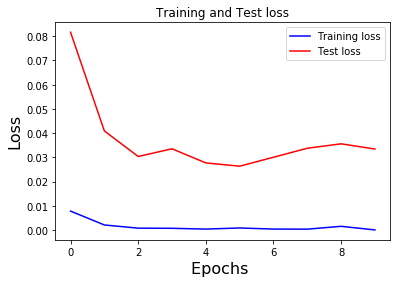

<Figure size 432x288 with 0 Axes>

In [49]:
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

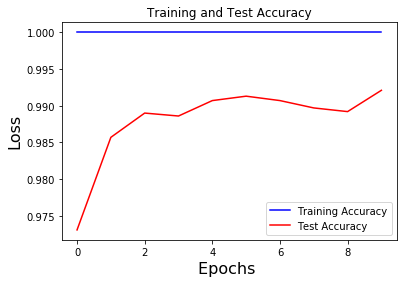

<Figure size 432x288 with 0 Axes>

In [50]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()